# Predicting Freshman GPA

### A. Import Libraries and Packages

In [8]:
# import libraries

# Numeric
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### B. Load Data

In [2]:
# Load data 
data = pd.read_csv("data/satgpa.csv", sep=',')

### C. Data Cleaning and EDA

In [3]:
data.head()

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      1000 non-null   int64  
 1   sat_v    1000 non-null   int64  
 2   sat_m    1000 non-null   int64  
 3   sat_sum  1000 non-null   int64  
 4   hs_gpa   1000 non-null   float64
 5   fy_gpa   1000 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [11]:
# Look for Duplicates
data.duplicated().sum()

0

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,1000.0,1.48400,0.499994,1.0,1.00,1.000,2.00,2.0
sat_v,1000.0,48.93400,8.233920,24.0,43.00,49.000,54.00,76.0
sat_m,1000.0,54.39500,8.450111,29.0,49.00,55.000,60.00,77.0
sat_sum,1000.0,103.32900,14.287368,53.0,93.00,103.000,113.00,144.0
hs_gpa,1000.0,3.19810,0.541647,1.8,2.80,3.200,3.70,4.5
fy_gpa,1000.0,2.46795,0.740805,0.0,1.98,2.465,3.02,4.0


In [10]:
data.corr()

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
sex,1.000000,-0.039160,-0.252366,-0.171827,0.141008,0.100242
sat_v,-0.039160,1.000000,0.466581,0.852262,0.359500,0.401390
sat_m,-0.252366,0.466581,1.000000,0.860333,0.378070,0.387118
sat_sum,-0.171827,0.852262,0.860333,1.000000,0.430788,0.460281
hs_gpa,0.141008,0.359500,0.378070,0.430788,1.000000,0.543353
fy_gpa,0.100242,0.401390,0.387118,0.460281,0.543353,1.000000


<Axes: >

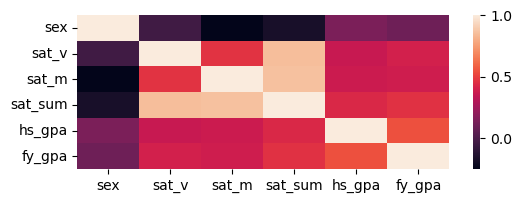

In [13]:
fig, ax = plt.subplots(figsize=(6,2)) 
sns.heatmap(data.corr())

In [28]:
def eda_subplots(data_df):
    # Define the layout of subplots
    # Determine the number of subplot rows/columns needed
    num_columns = len(data_df.columns)
    # For simplicity, creating a square layout or as close to square as possible
    n_cols = int(np.ceil(np.sqrt(num_columns)))
    n_rows = int(np.ceil(num_columns / n_cols))

    # Creating the figure and axes for subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5*n_rows, 3*n_cols))

    # Iterate over each column to plot
    for i, column in enumerate(data_df.columns):
       
        # Check if axes is a single-dimensional array
        if n_rows == 1 or n_cols == 1:
            ax = axes[i]
        else:
            # For a 2D array of subplots, index with row and column
            row, col = i // n_cols, i % n_cols
            ax = axes[row, col]
    
        # Plot histogram
        sns.histplot(
            data=data_df, x=column, kde=False, ax=ax, bins=50
        )
        ax.set_title(f'{column} Plot')

    plt.tight_layout()
    plt.show()


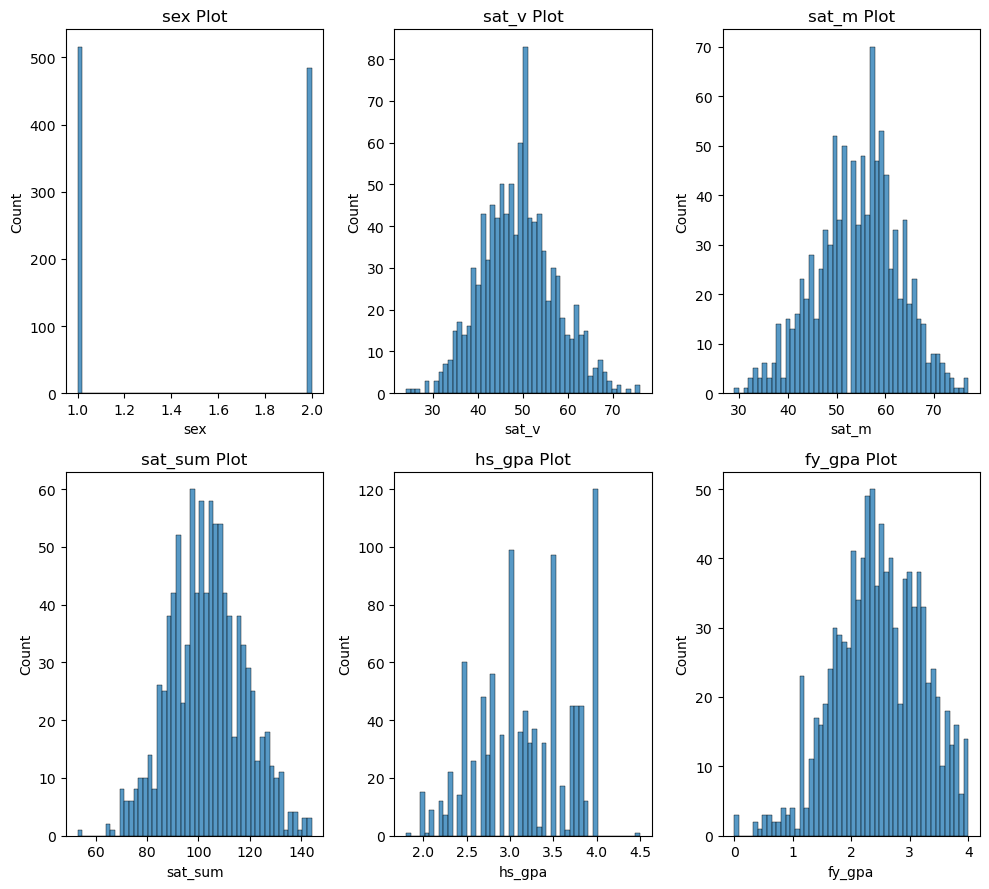

In [29]:
eda_subplots(data)

#### B. Insights:
* 1000 rows of data with 6 columns
*  No empty or duplicated rows or missing values
* All data is numeric
* sat_sum is highly correlated with sat_v and sat_m, thus can be dropped to reduce dimensionality

In [14]:
df = data.drop(columns = ['sat_sum'])
df.shape

(1000, 5)